<a href="https://colab.research.google.com/github/Silva-TI/MachineLearning-Silva/blob/main/Latihan_1_dan_2_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Latihan 1**

In [11]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances

import pandas as pd
df  = pd.read_excel('Suhu.xlsx')
df.head()

,Suhu,Angin,Kelas
0,10,0,Dingin
1,25,0,Panas
2,15,5,Dingin
3,20,3,Panas
4,18,7,Dingin


In [12]:
# 2. PILIH FITUR DAN LABEL
X = df[['Suhu', 'Angin']]
y = df['Kelas']

In [13]:
Encoding = {'Dingin': 0, 'Panas': 1}
df['Kelas_encoded'] = df['Kelas'].map(Encoding)
df.head()

,Suhu,Angin,Kelas,Kelas_encoded
0,10,0,Dingin,0
1,25,0,Panas,1
2,15,5,Dingin,0
3,20,3,Panas,1
4,18,7,Dingin,0


In [14]:
X = np.array(X)
y_encoded = np.array(df['Kelas_encoded'])

In [15]:
# 5. SPLIT DAT
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.flatten()

In [17]:
# 7. TRAINING KNN
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)


KNeighborsClassifier()

In [18]:
# 8. PREDIKSI DATA BARU
X_new = np.array([[16, 3]])          # suhu=16, angin=3
X_new_scaled = scaler.transform(X_new)

y_new = model.predict(X_new_scaled)

# Create an inverse mapping from the 'Encoding' dictionary
inverse_encoding = {v: k for k, v in Encoding.items()}
y_label = np.array([inverse_encoding[pred] for pred in y_new])

print("Prediksi (encoded):", y_new)
print("Prediksi (label asli):", y_label)

Prediksi (encoded): [0]
Prediksi (label asli): ['Dingin']


In [19]:
# 9. HITUNG JARAK EUCLIDEAN
distances = pairwise_distances(X_train, X_new_scaled, metric='euclidean')

print("\nJarak Euclidian ke setiap tetangga:")
print(distances.flatten())


Jarak Euclidian ke setiap tetangga:
[1.84390591 2.16887052 0.90140404 1.80280808 0.86322    1.56286346]


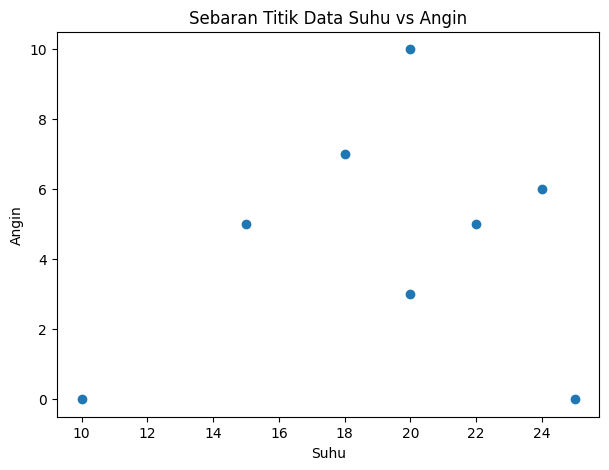

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df['Suhu'], df['Angin'])
plt.xlabel("Suhu")
plt.ylabel("Angin")
plt.title("Sebaran Titik Data Suhu vs Angin")
plt.show()


# **Latihan 2 - Confusion Matrix**

In [21]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

df = pd.read_excel("Lulus.xlsx")
df.head()


,NIM,Akurat,Prediksi
0,TI001,Lulus,Lulus
1,TI002,Lulus,Lulus
2,TI003,Lulus,Lulus
3,TI004,Lulus,Tidak Lulus
4,TI005,Lulus,Tidak Lulus


In [22]:
# 2. ENCODING LABEL
y_true = df["Akurat"].map({"Lulus": 1, "Tidak Lulus": 0})
y_pred = df["Prediksi"].map({"Lulus": 1, "Tidak Lulus": 0})

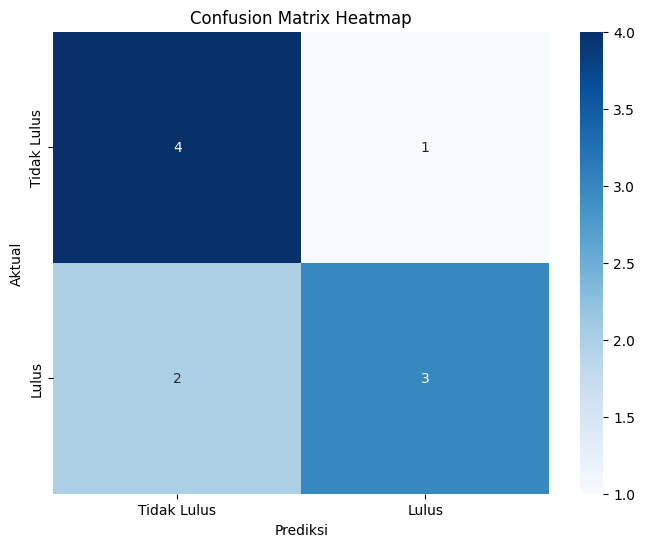

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred) # Define cm before using it

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Tidak Lulus', 'Lulus'],
            yticklabels=['Tidak Lulus', 'Lulus'])

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [24]:
# 4. HITUNG METRIK
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print("\nAccuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)


Accuracy : 0.7
Precision: 0.75
Recall   : 0.6
